Convert 256*256 Jpegs --> np arrays in shape (256, 256, 3)

In [9]:
import os
import numpy as np
from PIL import Image

#Create a list of image file names
file_list = os.listdir('initial images folder path')
image_files = [f for f in file_list if f.endswith('.jpeg')]

#Loop over each image file and transform it into a numpy array
for image_file in image_files:
    # Load the image as a PIL image
    img = Image.open(os.path.join('initial images folder path', image_file))

    # Convert the PIL image to a numpy array and reshape it
    img_array = np.array(img)
    img_array = img_array.reshape(256, 256, 3)

    # Save the numpy array as a .npy file
    np.save('output folder path' + image_file[:-4] + '.npy', img_array)


testing out kmeans color segmentation w/ sklearn

In [20]:
from sklearn.cluster import KMeans

image = np.load("one .npy file of image")
               
X = image.reshape(-1, 3)

#color segmentation
kmeans = KMeans(n_clusters=4).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

(256, 256, 3)


C:\Users\hunte\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(256, 256, 3)

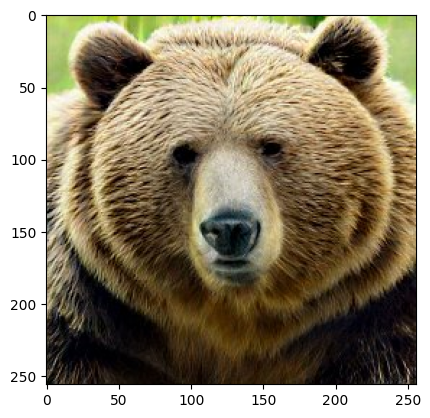

In [18]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

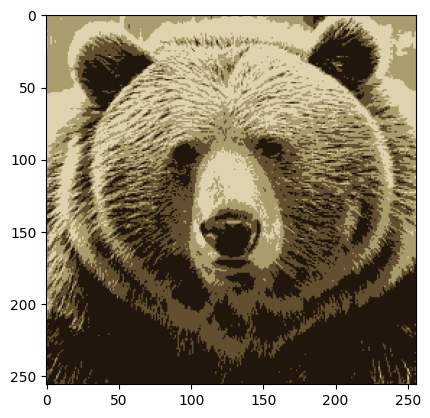

In [24]:
plt.imshow(segmented_img.astype(np.int64))
plt.show()

(256, 256, 3)


C:\Users\hunte\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


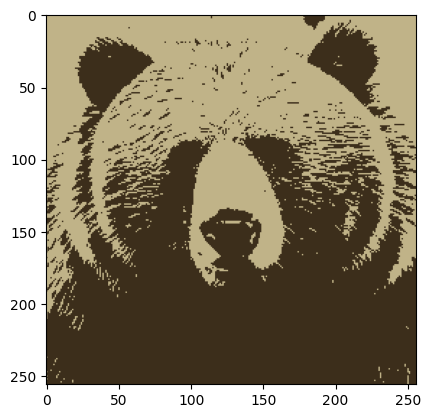

In [28]:
from sklearn.cluster import KMeans

image = np.load("C:\\Users\\hunte\\OneDrive\\Documents\\Coding Projects\\Machine Learning Learning\\Image Classification\\PandasBears\\Images as Array\\test_bears_np\\Test255..npy")

print(image.shape)
               
X = image.reshape(-1, 3)
   
kmeans = KMeans(n_clusters=2).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
segmented_img.shape

segmented_img = segmented_img.astype(np.int64)

plt.imshow(segmented_img)
plt.show()

bears will be labeled as 0, pandas will be labeled as 1

In [46]:
import os
import numpy as np

#bears test
folder_path = '\\Images as Array\\test_bears_np' 
files = os.listdir(folder_path)

# initialize an empty list to store all the arrays
arrays_list = []

# iterate over all files
for file in files:
    # construct full file path
    file_path = os.path.join(folder_path, file)
    
    # load the file
    array = np.load(file_path)
    
    
    # append the array to the list
    arrays_list.append(array)

bears_test = np.array(arrays_list)
bears_test_target = np.zeros(50,)

    
#pandas test
arrays_list = []

folder_path = '\\Images as Array\\test_pandas_np'  
files = os.listdir(folder_path)
# iterate over all files
for file in files:
    # construct full file path
    file_path = os.path.join(folder_path, file)
    
    # load the file
    array = np.load(file_path)
    
    # append the array to the list
    arrays_list.append(array)

pandas_test = np.array(arrays_list)
pandas_test_target = np.ones(50,)

#train bears
arrays_list = []

folder_path = '\\Images as Array\\train_bears_np'  
files = os.listdir(folder_path)
# iterate over all files
for file in files:
    # construct full file path
    file_path = os.path.join(folder_path, file)
    
    # load the file
    array = np.load(file_path)
    
    # append the array to the list
    arrays_list.append(array)

bears_train = np.array(arrays_list)
bears_train_target = np.zeros(250,)

#train pandas
arrays_list = []

folder_path = '\\Images as Array\\train_pandas_np'  
files = os.listdir(folder_path)
# iterate over all files
for file in files:
    # construct full file path
    file_path = os.path.join(folder_path, file)
    
    # load the file
    array = np.load(file_path)
    
    # append the array to the list
    arrays_list.append(array)
    
    
pandas_train = np.array(arrays_list)
pandas_train_target = np.ones(250,)


(50, 256, 256, 3)
(50,)
(50, 256, 256, 3)
(50,)
(250, 256, 256, 3)
(250,)
(250, 256, 256, 3)
(250,)


Concatenate all data into a single X and y array

In [47]:
X = np.concatenate([bears_test, pandas_test, bears_train, pandas_train])
y = np.concatenate([bears_test_target, pandas_test_target, bears_train_target, pandas_train_target])

print(X.shape)
print(y.shape)

(600, 256, 256, 3)
(600,)


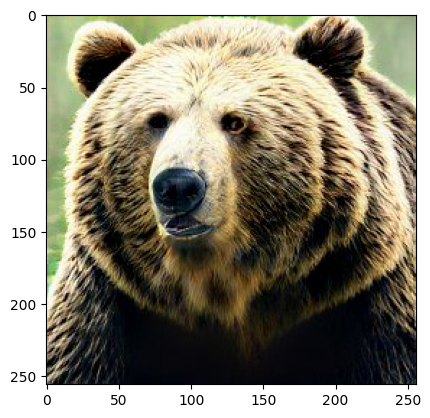

0.0


In [49]:
plt.imshow(X[0].astype(np.int64))
plt.show()


print(y[0])

In [53]:
np.save("pandas_bears_X.npy", X)
np.save("pandas_bears_y.npy", y)